In [280]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [281]:
# Define a function to plot data points
def plot_data_knn(df, new_point, predicted_class=None, k=None):
    plt.figure(figsize=(4, 3))
    plt.scatter(df.loc[df['class'] == 0, 'x1'], df.loc[df['class'] == 0, 'x2'], color='red', label='Class 0', marker='o')
    plt.scatter(df.loc[df['class'] == 1, 'x1'], df.loc[df['class'] == 1, 'x2'], color='blue', label='Class 1', marker='s')
    plt.scatter(new_point['x1'], new_point['x2'], color='green', label=f'New Point (Class {predicted_class})' if predicted_class is not None else 'New Point', marker='*', s=200)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f"Classification Result with k={k}" if k is not None else "Data Points")
    plt.legend()
    plt.show()

# k-NN

In [282]:
# Data points
x1_data = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12]
x2_data = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

data = pd.DataFrame({"x1": x1_data, "x2": x2_data, "class": classes})
data

,x1,x2,class
0,4,21,0
1,5,19,0
2,10,24,1
3,4,17,0
4,3,16,0
5,11,25,1
6,14,24,1
7,8,22,0
8,10,21,1
9,12,21,1


In [283]:
# New test data point
new_x1 = 8
new_x2 = 21

new_point = pd.DataFrame({'x1': [new_x1], 'x2': [new_x2]})
new_point

,x1,x2
0,8,21


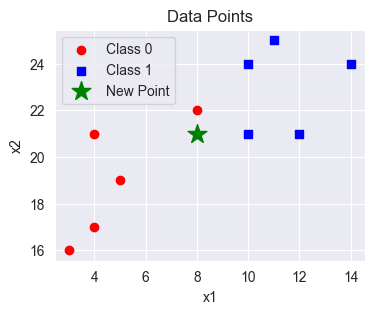

In [284]:
plot_data_knn(data, new_point)

In [285]:
x = data[['x1', 'x2']]
y = data['class']

In [286]:
knn = KNeighborsClassifier(n_neighbors=len(x))
knn.fit(x, y)

distances, indices = knn.kneighbors(new_point)

In [287]:
distances

array([[1.        , 2.        , 3.60555128, 3.60555128, 4.        ,
        4.        , 5.        , 5.65685425, 6.70820393, 7.07106781]])

In [288]:
indices

array([[7, 8, 1, 2, 0, 9, 5, 3, 6, 4]], dtype=int64)

In [289]:
print(f"Distances from the new point to each data point:")
for i, distance, in zip(indices[0], distances[0]):
    print(f"Distance to point {i} ({data.loc[i, 'x1']}, {data.loc[i, 'x2']}): {distance: .2f}")

Distances from the new point to each data point:
Distance to point 7 (8, 22):  1.00
Distance to point 8 (10, 21):  2.00
Distance to point 1 (5, 19):  3.61
Distance to point 2 (10, 24):  3.61
Distance to point 0 (4, 21):  4.00
Distance to point 9 (12, 21):  4.00
Distance to point 5 (11, 25):  5.00
Distance to point 3 (4, 17):  5.66
Distance to point 6 (14, 24):  6.71
Distance to point 4 (3, 16):  7.07


In [290]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x, y)
predicted_class = knn.predict(new_point)
print(f"predicted class: {predicted_class}")

predicted class: [1]


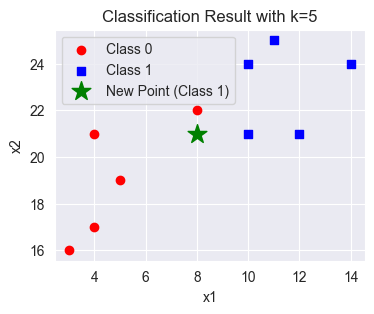

In [291]:
plot_data_knn(data, new_point, predicted_class[0], k=k)

In [292]:
data_dmv = pd.read_excel("./dmv.xlsx")
data_dmv

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [293]:
x_independent = data_dmv.iloc[:, [0, 1]].values
y_independent = data_dmv.iloc[:, 2].values

In [294]:
X_train, X_test, y_train, y_test = train_test_split(x_independent, y_independent, test_size=0.25)

In [295]:
knn_new = KNeighborsClassifier(n_neighbors=len(X_train))
knn_new.fit(X_train, y_train)
y_pred = knn_new.predict(X_test)

In [296]:
def print_metrics(y_test, y_pred):
    print(f"Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))

In [297]:
print_metrics(y_test, y_pred)

Confusion Matrix:
[[ 0 13]
 [ 0 12]]
Accuracy:  0.48
Recall:  1.0
Precision:  0.48


In [298]:
naive_bayes_model_1 = GaussianNB()
naive_bayes_model_1.fit(X_train, y_train)
y_pred_nv_model_1 = naive_bayes_model_1.predict(X_test)
print_metrics(y_test, y_pred_nv_model_1)

Confusion Matrix:
[[11  2]
 [ 1 11]]
Accuracy:  0.88
Recall:  0.9166666666666666
Precision:  0.8461538461538461


In [299]:
naive_bayes_model_2 = BernoulliNB()
naive_bayes_model_2.fit(X_train, y_train)
y_pred_nv_model_2 = naive_bayes_model_2.predict(X_test)
print_metrics(y_test, y_pred_nv_model_2)

Confusion Matrix:
[[ 0 13]
 [ 0 12]]
Accuracy:  0.48
Recall:  1.0
Precision:  0.48
